In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
import sys
sys.path.append('../') # add the root folder to the path

from diffusion_model.backward_module import BackwardModule
from diffusion_model.forward_module import ForwardModule
from diffusion_model.scheduler import Scheduler
from diffusion_model.models import ConditionalNoiseModel
from diffusion_model.datasets import get_moons_dataset

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import matplotlib

In [30]:
FIG_SIZE = 4
matplotlib.rcParams['figure.figsize'] = (FIG_SIZE, FIG_SIZE)

# Datasets

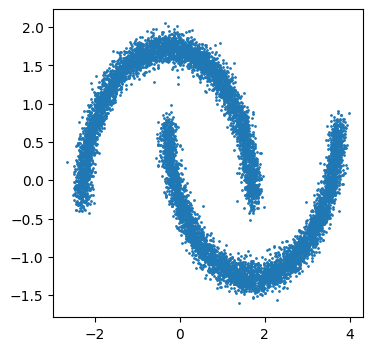

In [31]:
N_SAMPLES = 10000

dataset = get_moons_dataset(N_SAMPLES)

plt.scatter(dataset[:, 0], dataset[:, 1], s=1)

# Plot helpers

In [53]:
def plot_evolutions(xs_t, y_label=None, title=None):
    fig, axes = plt.subplots(1, len(xs_t), figsize=(FIG_SIZE*len(xs_t), FIG_SIZE))
    if title is not None:
        fig.suptitle(title)
    if y_label is not None:
        axes[0].set_ylabel(y_label)
    for i, ax in enumerate(axes):
        progress = i / (len(xs_t)-1)
        ax.scatter(xs_t[i][:, 0], xs_t[i][:, 1], s=1)
        ax.set_title(f"{progress*100:.0f}%")
    plt.show()

# Diffusion model

In [59]:
T = 100

scheduler = Scheduler(input_dim=2, nb_steps=T)
forward_module = ForwardModule(scheduler=scheduler)
noise_model = ConditionalNoiseModel(forward_module=forward_module, scheduler=scheduler)
backward_module = BackwardModule(forward_module=forward_module, scheduler=scheduler, noise_model=noise_model)

## Forward

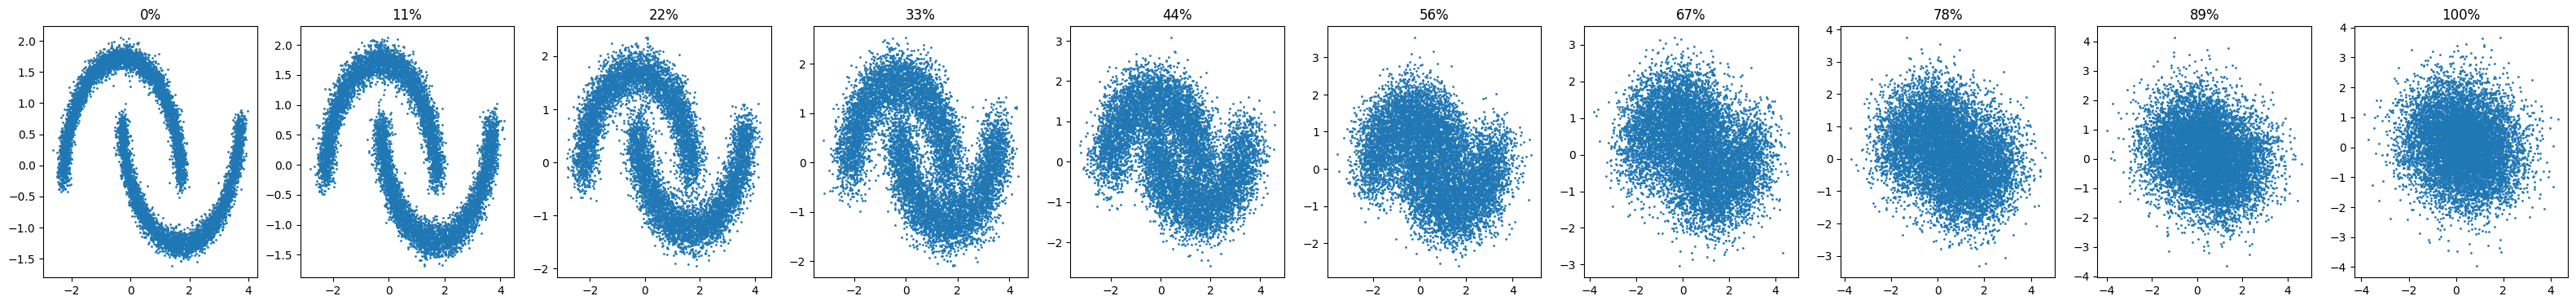

In [60]:
NB_DISPLAYED = 10

xs_t = forward_module.loop_forward(dataset, nb_displayed_steps=NB_DISPLAYED)
plot_evolutions(xs_t)

## Train the noise model

  0%|          | 0/1000 [00:00<?, ?it/s]

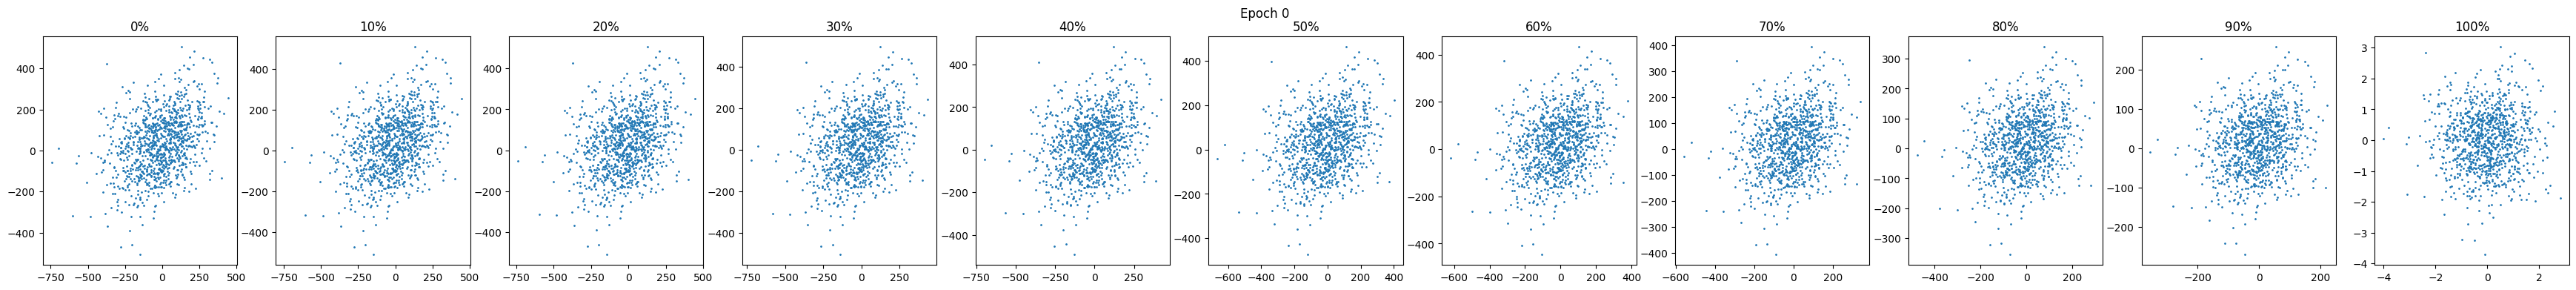

 10%|█         | 100/1000 [00:13<01:58,  7.58it/s]

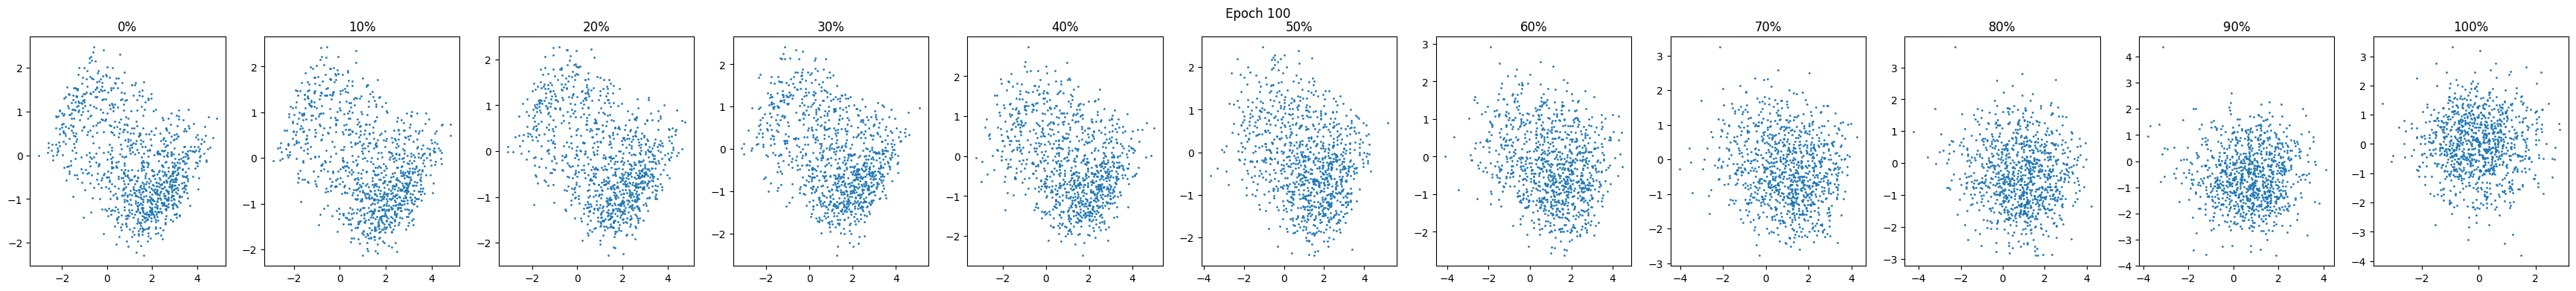

 20%|██        | 200/1000 [00:27<01:38,  8.09it/s]

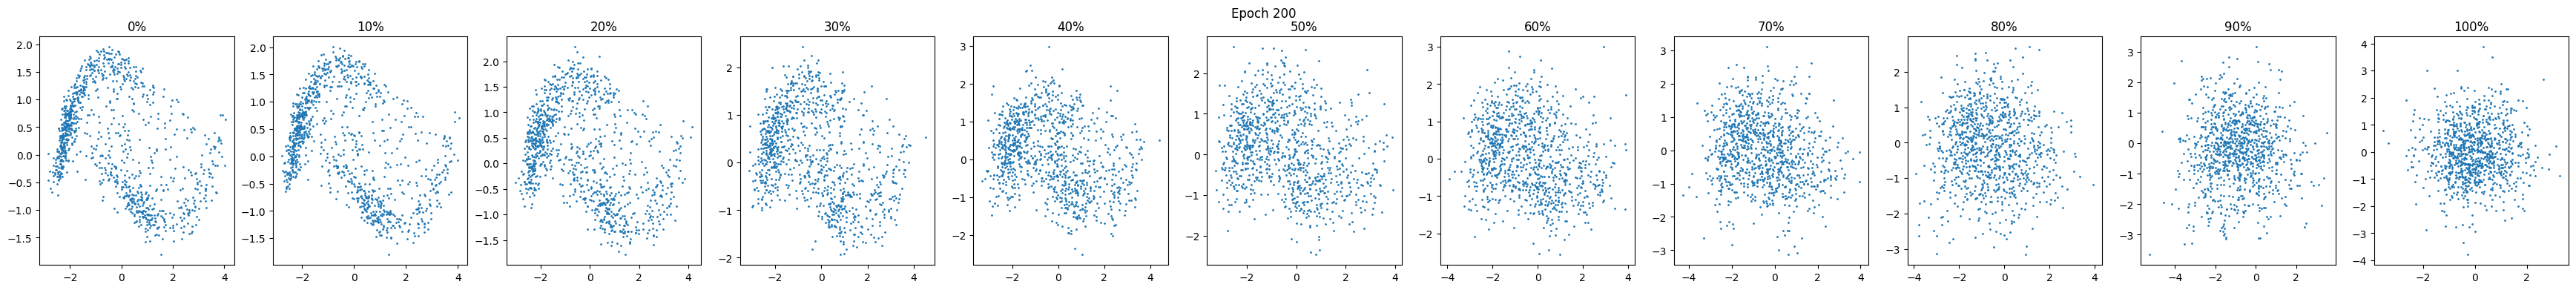

 30%|███       | 300/1000 [00:41<01:30,  7.70it/s]

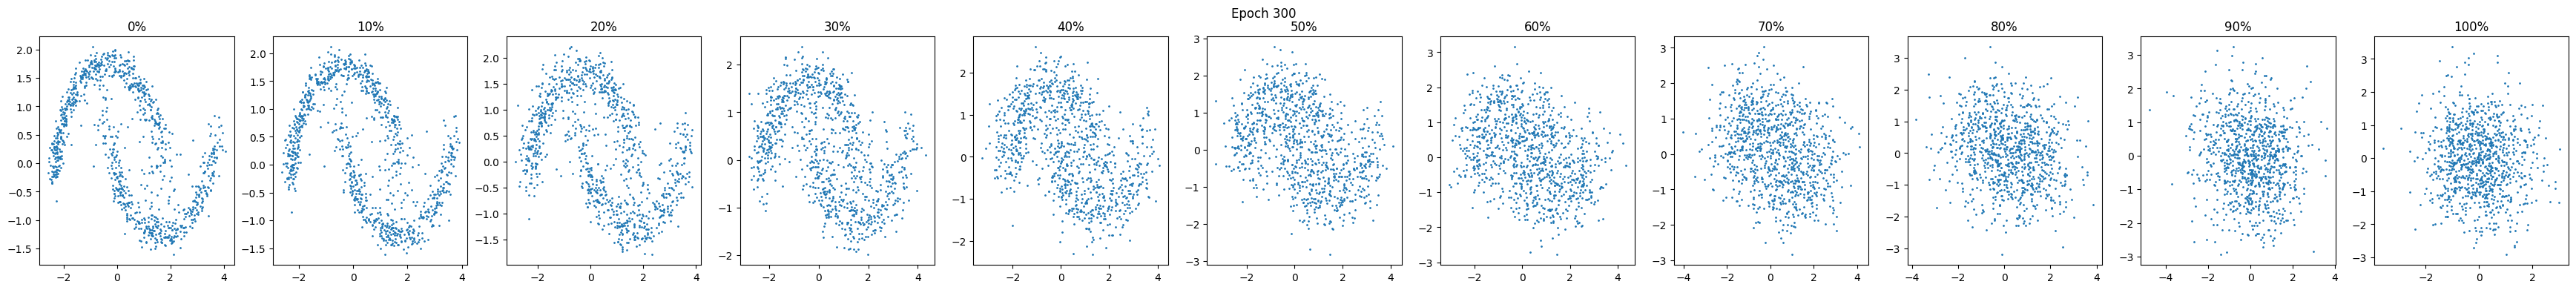

 40%|████      | 400/1000 [00:56<01:22,  7.30it/s]

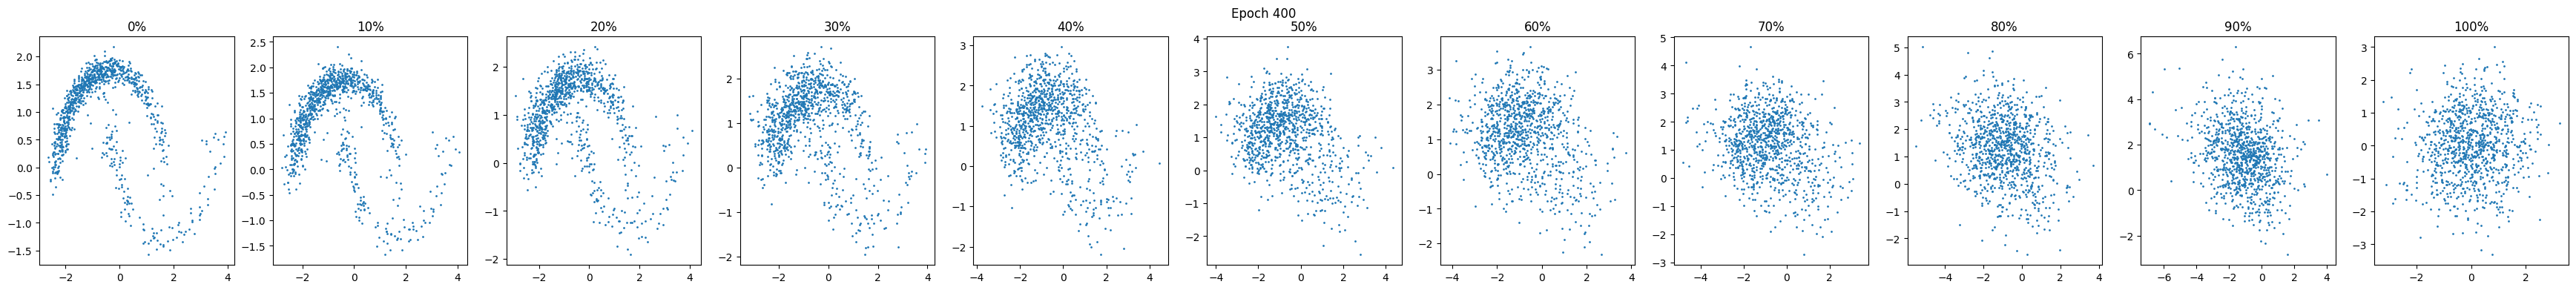

 50%|█████     | 500/1000 [01:12<01:14,  6.70it/s]

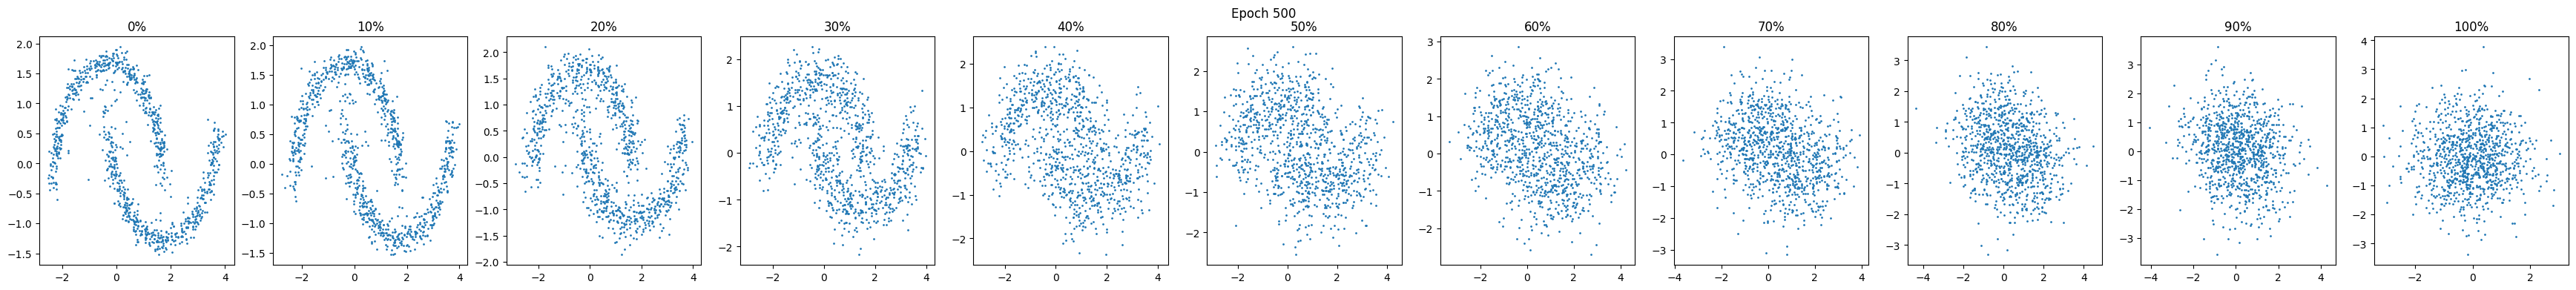

 60%|██████    | 600/1000 [01:26<00:51,  7.77it/s]

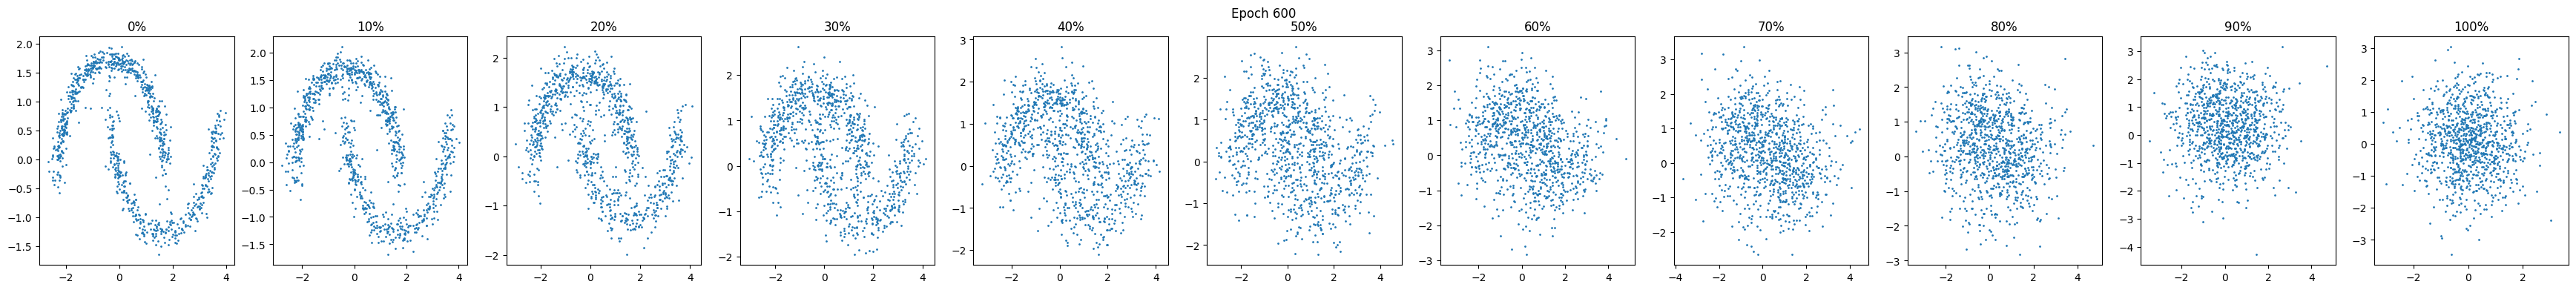

 70%|███████   | 700/1000 [01:39<00:39,  7.59it/s]

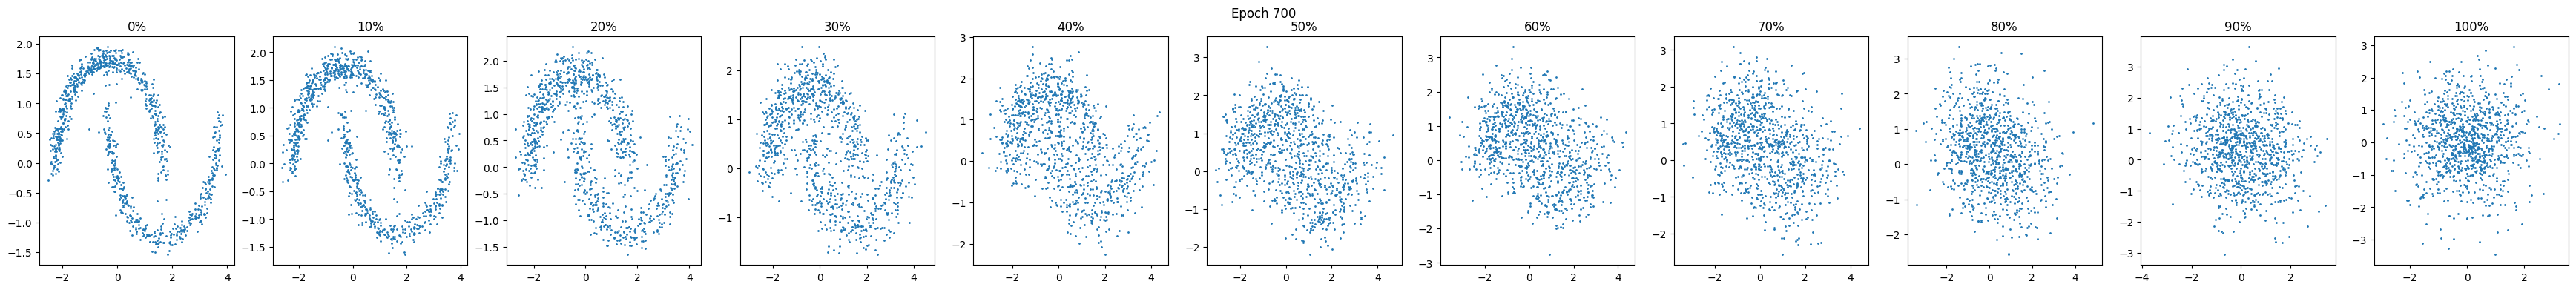

 80%|████████  | 800/1000 [01:52<00:21,  9.12it/s]

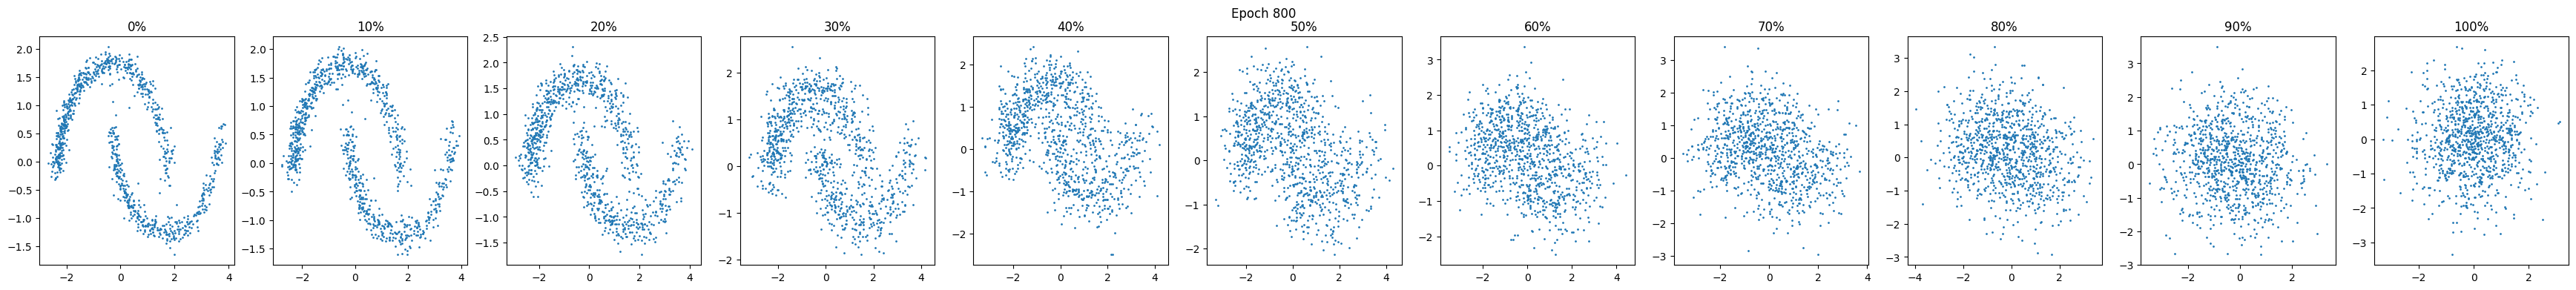

 90%|█████████ | 900/1000 [02:04<00:10,  9.17it/s]

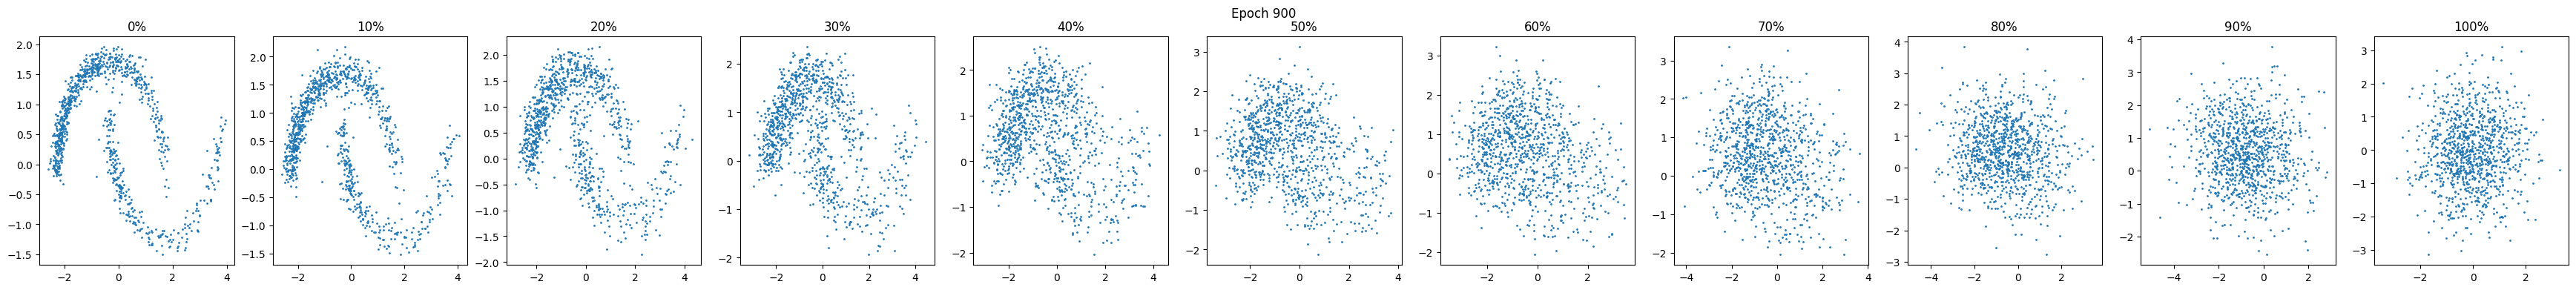

100%|██████████| 1000/1000 [02:15<00:00,  7.36it/s]


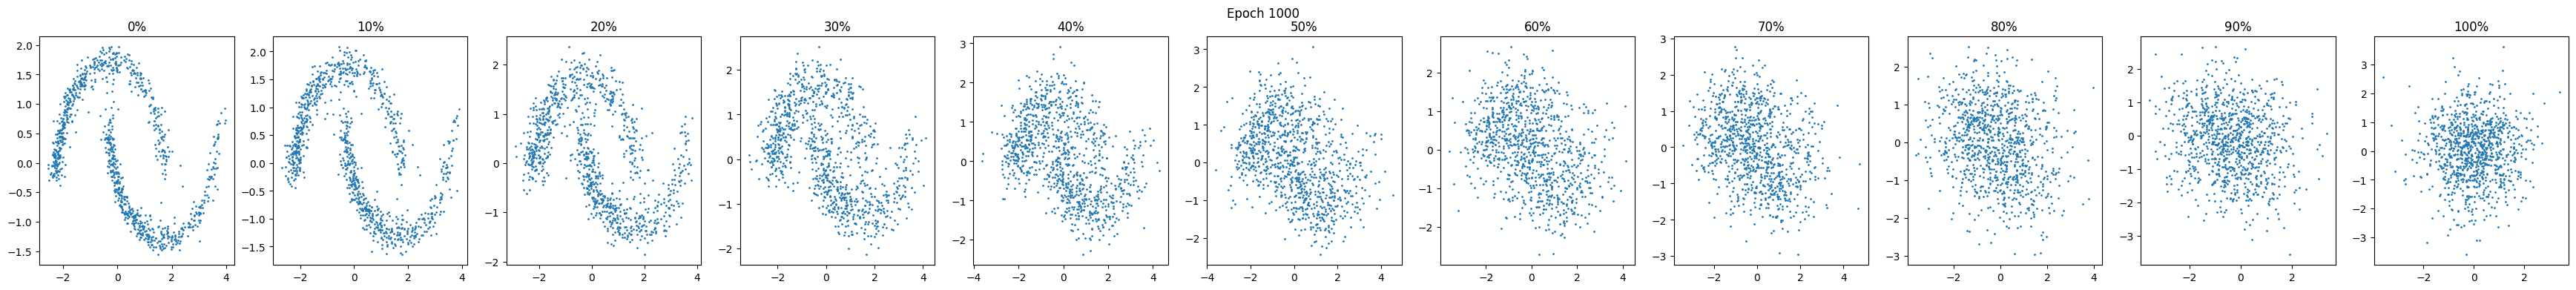

In [61]:
BATCH_SIZE = 256
NB_EPOCHS = 1000

def display_evolutions(epoch, *_):
    N_SAMPLES = 1000
    xs_t = backward_module.loop_backward(n_sample=N_SAMPLES, nb_displayed_steps=NB_DISPLAYED)
    plot_evolutions(xs_t, title=f"Epoch {epoch}")

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
noise_model.fit(dataloader, nb_epochs=NB_EPOCHS, logger=display_evolutions)
display_evolutions(NB_EPOCHS)

## Backward

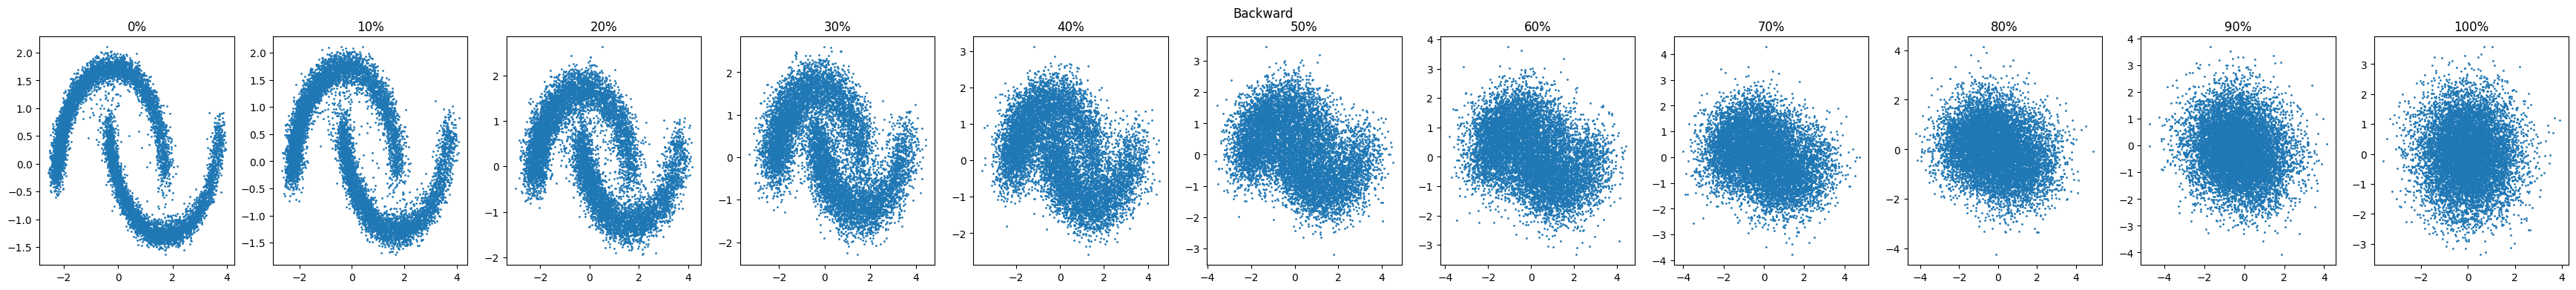

In [62]:
xs_t = backward_module.loop_backward(n_sample=N_SAMPLES, nb_displayed_steps=NB_DISPLAYED)
plot_evolutions(xs_t, title="Backward")